<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 3 / NOTE 2*

# 📝 Assignment
---
# Data Wrangling


### 1) 지속적으로 여러분의 포트폴리오 데이터를 랭글링 하세요
- 여러분이 선택한 데이터들을 랭글링하여 모델을 만들기 위한 테이블 형태의 데이터로 만들어 보세요.
- **다음 함수의 result를 완성시키고 리턴값을 과제 제출폼에 제출하세요.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### 이곳에서 제출폼 과제를 진행해 주세요 ###
import pandas as pd
df = pd.read_csv("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/assignments/purchase_data.csv", sep=",",index_col=0)

In [3]:
df.head()

,SN,Age,Gender,Item ID,Item Name,Price
Purchase ID,,,,,,
0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,Ithergue48,24,Male,92,Final Critic,4.88
3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,Iskosia90,23,Male,131,Fury,1.44


In [4]:
## 다음 result 함수 안에 male, female 변수를 계산하세요.(groupby, get_group을 사용하세요.)
## sum_male: Age = 20, Gender = "Male" 그룹의 Price를 합하세요.
## sum_female: Age = 20, Gender = "Female" 그룹의 Price를 합하세요.

def result(df):
  sum_male = df.groupby(['Age','Gender']).sum().loc[(20,'Male'),'Price']
  sum_female = df.groupby(['Age','Gender']).sum().loc[(20,'Female'),'Price']

  print("sum_male: {}, sum_female: {}".format(sum_male, sum_female))
  return round(sum_male + sum_female)

print("return:",result(df))

sum_male: 260.20000000000005, sum_female: 43.730000000000004
return: 304


#### -- 진동 데이터 활용 충돌체 탐지 : 데이터 랭글링

In [5]:
### 이곳에서 본인 데이터로 과제를 진행해 주세요 ### 
# 원전 내부의 충돌체 정보를 네개의 센서 정보만으로 특정해내기
# 데이터 출처 : https://dacon.io/competitions/official/235614/overview/description/
train_features = pd.read_csv('D:/Data/KAERI_dataset/train_features.csv')
train_target = pd.read_csv('D:/Data/KAERI_dataset/train_target.csv')

In [6]:
train_features.isnull().sum()

id      0
Time    0
S1      0
S2      0
S3      0
S4      0
dtype: int64

In [7]:
train_target.isnull().sum()

id    0
X     0
Y     0
M     0
V     0
dtype: int64

In [8]:
# feautre. 감지된 신호가 같은 것인지 id로 분류되어 있다.
train_features.head(11)

,id,Time,S1,S2,S3,S4
0,0,0.000000,0.000000e+00,0.000000e+00,0.0,0.0
1,0,0.000004,0.000000e+00,0.000000e+00,0.0,0.0
2,0,0.000008,0.000000e+00,0.000000e+00,0.0,0.0
3,0,0.000012,0.000000e+00,0.000000e+00,0.0,0.0
4,0,0.000016,0.000000e+00,0.000000e+00,0.0,0.0
5,0,0.000020,0.000000e+00,0.000000e+00,0.0,0.0
6,0,0.000024,0.000000e+00,0.000000e+00,0.0,0.0
7,0,0.000028,0.000000e+00,0.000000e+00,0.0,0.0
8,0,0.000032,0.000000e+00,0.000000e+00,0.0,0.0
9,0,0.000036,0.000000e+00,0.000000e+00,0.0,0.0


In [9]:
# target. 총 네가지가 있다.
train_target.head()

,id,X,Y,M,V
0,0,0.0,-400.0,50.0,0.4
1,1,400.0,0.0,100.0,1.0
2,2,-300.0,-200.0,25.0,0.4
3,3,200.0,-100.0,150.0,0.4
4,4,-300.0,-100.0,150.0,0.4


In [10]:
train_features.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1050000.0,1399.500000,808.290710,0.0,699.750000,1399.500000,2099.250000,2.799000e+03
Time,1050000.0,0.000748,0.000433,0.0,0.000372,0.000748,0.001124,1.496000e-03
S1,1050000.0,-405.098322,275317.447763,-5596468.0,-74263.207500,0.000000,73911.415000,3.865086e+06
S2,1050000.0,-405.098322,275317.447763,-5596468.0,-74263.207500,0.000000,73911.415000,3.865086e+06
S3,1050000.0,-1334.343465,265535.116902,-2772952.0,-78554.880000,0.000000,72958.360000,3.655237e+06
S4,1050000.0,-1605.663879,302697.032088,-6069645.0,-78183.710000,0.000000,76658.080000,3.687344e+06


In [11]:
train_target.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2800.0,1399.5,808.434702,0.0,699.75,1399.5,2099.25,2799.0
X,2800.0,0.0,259.854028,-400.0,-200.00,0.0,200.00,400.0
Y,2800.0,-5.0,255.926537,-400.0,-200.00,0.0,200.00,400.0
M,2800.0,100.0,50.008931,25.0,50.00,100.0,150.00,175.0
V,2800.0,0.6,0.282893,0.2,0.40,0.6,0.80,1.0


In [12]:
# 타겟에는 id가 하나씩만 있다.
train_features.shape, train_target.shape

((1050000, 6), (2800, 5))

<AxesSubplot:xlabel='Time', ylabel='S1'>

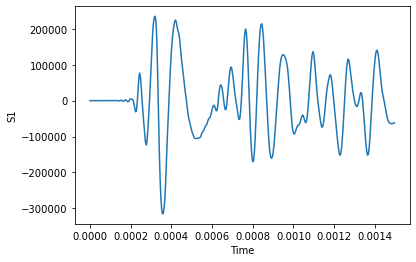

In [13]:
# 센서가 감지하는 신호를 시각화
sns.lineplot(data=train_features.loc[train_features['id']==0],x='Time',y='S1')

<AxesSubplot:xlabel='Time', ylabel='S1'>

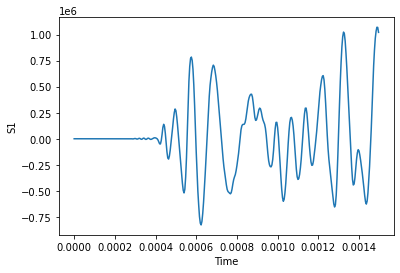

In [14]:
sns.lineplot(data=train_features.loc[train_features['id']==1],x='Time',y='S1')

In [15]:
# 얘네를 푸리에 급수로 바꿀 수 있으면, 그걸로도 새로운 feature가 될 것 같은데...
# 일단 이건 다음에 푸리에 급수로 근사시키는 방법을 찾아서 해보자.

In [16]:
# 신호가 감지되지 않은 부분은 제외하고 살피기.
cond_active = (train_features['S1'] != 0) | (train_features['S2'] != 0) | (train_features['S3'] != 0) | (train_features['S4'] != 0)
train_features[cond_active].head()

,id,Time,S1,S2,S3,S4
10,0,0.000040,-4.972607e-08,-4.972607e-08,0.0,0.0
11,0,0.000044,-1.003740e-06,-1.003740e-06,0.0,0.0
12,0,0.000048,-7.595561e-06,-7.595561e-06,0.0,0.0
13,0,0.000052,-6.670683e-05,-6.670683e-05,0.0,0.0
14,0,0.000056,-3.694994e-04,-3.694994e-04,0.0,0.0


In [17]:
# 센서가 반응하는 중인 데이터만 따로 모은다
train_active = train_features[cond_active]

In [18]:
# 가장 처음에 센서가 감지했던 타이밍만 남긴다
# 거기에, 각 센서들이 처음 감지한 이후 다음 감지할때의 변화율을 delta_Sn으로 추가
# target과 같은 크기로 만들었다. 이 상태로, 다른 feature를 추가하자.
train_active = train_active.drop_duplicates(['id'],keep='first')
for n in train_active.index:
  for s in ['S1','S2','S3','S4']:
    train_active.loc[n,'delta_'+s] = train_features.loc[n+1,'S1']-train_features.loc[n,'S1']
train_active

,id,Time,S1,S2,S3,S4,delta_S1,delta_S2,delta_S3,delta_S4
10,0,0.000040,-4.972607e-08,-4.972607e-08,0.0,0.000000e+00,-9.540139e-07,-9.540139e-07,-9.540139e-07,-9.540139e-07
380,1,0.000020,0.000000e+00,-4.104924e-07,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
754,2,0.000016,-9.210808e-05,0.000000e+00,0.0,0.000000e+00,-6.751038e-03,-6.751038e-03,-6.751038e-03,-6.751038e-03
1133,3,0.000032,0.000000e+00,-1.783159e-07,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1505,4,0.000020,3.230998e-07,0.000000e+00,0.0,0.000000e+00,1.472695e-05,1.472695e-05,1.472695e-05,1.472695e-05
...,...,...,...,...,...,...,...,...,...,...
1048129,2795,0.000016,0.000000e+00,0.000000e+00,0.0,3.893916e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1048502,2796,0.000008,1.343907e-06,0.000000e+00,0.0,0.000000e+00,2.836478e-03,2.836478e-03,2.836478e-03,2.836478e-03
1048882,2797,0.000028,0.000000e+00,0.000000e+00,0.0,-4.435977e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1049256,2798,0.000024,0.000000e+00,0.000000e+00,0.0,-9.894686e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


### 2) 새로 특징들을 만들어 보세요
- 여러분이 선택한 데이터에서 특징 공학을 수행해 보세요.
- **(다중선택) purchase_data를 랭글링하여 다음 조건을 계산하고 결과가 올바른 항목만 과제 제출폼에 제출하세요.**
    1. 나이 1-20세 그룹(20세 포함)의 평균 Price는 3.101818이다.
    2. 나이 21-50세 그룹의 평균 Price는 3.021559이다.
    3. 가장 많이 구입한 아이템의 ID는 178 이다.
    4. 두번째로 매출을 많이 낸 아이템 ID는 145이다.

In [19]:
df['Age'].describe()

count    780.000000
mean      22.714103
std        6.659444
min        7.000000
25%       20.000000
50%       22.000000
75%       25.000000
max       45.000000
Name: Age, dtype: float64

In [20]:
### 이곳에서 제출폼 과제를 진행해 주세요 ###
# 그룹별 Price 평균
df['Age_group'] = np.where(df['Age']<=20,'1-20','21-50')
under_20 = df.groupby('Age_group').mean().loc['1-20','Price']
over_20 = df.groupby('Age_group').mean().loc['21-50','Price']
print("1-20세 그룹 평균 Price :",round(under_20,6))
print("21-50세 그룹 평균 Price :",round(over_20,6))

# 판매수 상위 첫번째 Item ID
top_count_item_id = list(df.groupby('Item ID').count().sort_values(by='Price',ascending=False).head(1).index)[0]
print("판매수 상위 첫번째 item id :",top_count_item_id)

# 매출 상위 두번째 Item IDs
top_sale_item_id = list(df.groupby('Item ID').sum().sort_values(by='Price',ascending=False).head(2).index)[1]
print("매출 상위 두번째 item id :",top_sale_item_id)

1-20세 그룹 평균 Price : 3.101818
21-50세 그룹 평균 Price : 3.021559
판매수 상위 첫번째 item id : 178
매출 상위 두번째 item id : 82


#### -- 진동 데이터 활용 충돌체 탐지 : 특성 공학

In [21]:
### 이곳에서 본인 데이터로 과제를 진행해 주세요 ### 
# 같은 id 내에서, 감지된 진동의 최고점과 최저점을 찾아서 그 차이를 기록한다
(train_features.groupby(by='id').max()['S1'] - train_features.groupby(by='id').min()['S1'] ).reset_index()

,id,S1
0,0,550552.4
1,1,1896170.9
2,2,747684.0
3,3,709331.0
4,4,1346981.9
...,...,...
2795,2795,1491891.5
2796,2796,783892.5
2797,2797,236713.7
2798,2798,1164571.3


In [22]:
for s in ['S1','S2','S3','S4']:
  min_s = train_features.groupby(by='id').min()[s]
  max_s = train_features.groupby(by='id').max()[s]
  gap_s = max_s - min_s
  gap_s = gap_s.reset_index()
  gap_s.columns = ['id','gap_'+s]
  train_active = train_active.merge(gap_s,on='id')
train_active.head()

,id,Time,S1,S2,S3,S4,delta_S1,delta_S2,delta_S3,delta_S4,gap_S1,gap_S2,gap_S3,gap_S4
0,0,0.000040,-4.972607e-08,-4.972607e-08,0.0,0.0,-9.540139e-07,-9.540139e-07,-9.540139e-07,-9.540139e-07,550552.4,550552.4,400562.5,580422.9
1,1,0.000020,0.000000e+00,-4.104924e-07,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1896170.9,3635054.0,2088574.6,2402025.0
2,2,0.000016,-9.210808e-05,0.000000e+00,0.0,0.0,-6.751038e-03,-6.751038e-03,-6.751038e-03,-6.751038e-03,747684.0,311776.4,299182.2,369962.9
3,3,0.000032,0.000000e+00,-1.783159e-07,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,709331.0,1105436.3,728161.5,951799.3
4,4,0.000020,3.230998e-07,0.000000e+00,0.0,0.0,1.472695e-05,1.472695e-05,1.472695e-05,1.472695e-05,1346981.9,699822.8,797120.3,869695.4


In [23]:
# 시간을 x10^6 해서 int로 바꿔주자
train_active['Time'] = (train_active['Time']*10**6).astype('int')
train_active.head()

,id,Time,S1,S2,S3,S4,delta_S1,delta_S2,delta_S3,delta_S4,gap_S1,gap_S2,gap_S3,gap_S4
0,0,40,-4.972607e-08,-4.972607e-08,0.0,0.0,-9.540139e-07,-9.540139e-07,-9.540139e-07,-9.540139e-07,550552.4,550552.4,400562.5,580422.9
1,1,20,0.000000e+00,-4.104924e-07,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1896170.9,3635054.0,2088574.6,2402025.0
2,2,16,-9.210808e-05,0.000000e+00,0.0,0.0,-6.751038e-03,-6.751038e-03,-6.751038e-03,-6.751038e-03,747684.0,311776.4,299182.2,369962.9
3,3,32,0.000000e+00,-1.783159e-07,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,709331.0,1105436.3,728161.5,951799.3
4,4,20,3.230998e-07,0.000000e+00,0.0,0.0,1.472695e-05,1.472695e-05,1.472695e-05,1.472695e-05,1346981.9,699822.8,797120.3,869695.4


In [24]:
# 네가지 센서들이 각각 처음 진동을 감지한 순간이 언제인지 기록
train_features[(train_features['S2'] != 0)].drop_duplicates(['id'],keep='first')[['id','Time']]

,id,Time
10,0,0.000040
380,1,0.000020
772,2,0.000088
1133,3,0.000032
1523,4,0.000092
...,...,...
1048139,2795,0.000056
1048526,2796,0.000104
1048893,2797,0.000072
1049264,2798,0.000056


In [25]:
for s in ['S1','S2','S3','S4']:
  cond = (train_features[s] != 0)
  active_time = train_features[cond].drop_duplicates(['id'],keep='first')[['id','Time']]
  active_time['Time'] = (active_time['Time']*10**6).astype('int')
  active_time.columns = ['id','active_time_'+s]
  train_active = train_active.merge(active_time,on='id')

train_active.head()

,id,Time,S1,S2,S3,S4,delta_S1,delta_S2,delta_S3,delta_S4,gap_S1,gap_S2,gap_S3,gap_S4,active_time_S1,active_time_S2,active_time_S3,active_time_S4
0,0,40,-4.972607e-08,-4.972607e-08,0.0,0.0,-9.540139e-07,-9.540139e-07,-9.540139e-07,-9.540139e-07,550552.4,550552.4,400562.5,580422.9,40,40,112,88
1,1,20,0.000000e+00,-4.104924e-07,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1896170.9,3635054.0,2088574.6,2402025.0,108,20,72,56
2,2,16,-9.210808e-05,0.000000e+00,0.0,0.0,-6.751038e-03,-6.751038e-03,-6.751038e-03,-6.751038e-03,747684.0,311776.4,299182.2,369962.9,16,88,88,68
3,3,32,0.000000e+00,-1.783159e-07,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,709331.0,1105436.3,728161.5,951799.3,76,32,72,48
4,4,20,3.230998e-07,0.000000e+00,0.0,0.0,1.472695e-05,1.472695e-05,1.472695e-05,1.472695e-05,1346981.9,699822.8,797120.3,869695.4,20,92,80,56


In [26]:
# 위치를 특정하는데 쓰일만한 feature로 각 센서들 사이의 상호 관계 비율을 만들어 주자
# R12 = (ts1+ts2)/(ts3+ts4), R13 = (ts1+ts3)/(ts2+ts4), R14 = (ts1+ts4)/(ts2+ts3) 이렇게 세가지를 추가
train_active['R12'] = (train_active['active_time_S1']+train_active['active_time_S2'])/(train_active['active_time_S3']+train_active['active_time_S4'])
train_active['R13'] = (train_active['active_time_S1']+train_active['active_time_S3'])/(train_active['active_time_S2']+train_active['active_time_S4'])
train_active['R14'] = (train_active['active_time_S1']+train_active['active_time_S4'])/(train_active['active_time_S2']+train_active['active_time_S3'])
train_active.head()

,id,Time,S1,S2,S3,S4,delta_S1,delta_S2,delta_S3,delta_S4,...,gap_S2,gap_S3,gap_S4,active_time_S1,active_time_S2,active_time_S3,active_time_S4,R12,R13,R14
0,0,40,-4.972607e-08,-4.972607e-08,0.0,0.0,-9.540139e-07,-9.540139e-07,-9.540139e-07,-9.540139e-07,...,550552.4,400562.5,580422.9,40,40,112,88,0.400000,1.187500,0.842105
1,1,20,0.000000e+00,-4.104924e-07,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3635054.0,2088574.6,2402025.0,108,20,72,56,1.000000,2.368421,1.782609
2,2,16,-9.210808e-05,0.000000e+00,0.0,0.0,-6.751038e-03,-6.751038e-03,-6.751038e-03,-6.751038e-03,...,311776.4,299182.2,369962.9,16,88,88,68,0.666667,0.666667,0.477273
3,3,32,0.000000e+00,-1.783159e-07,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1105436.3,728161.5,951799.3,76,32,72,48,0.900000,1.850000,1.192308
4,4,20,3.230998e-07,0.000000e+00,0.0,0.0,1.472695e-05,1.472695e-05,1.472695e-05,1.472695e-05,...,699822.8,797120.3,869695.4,20,92,80,56,0.823529,0.675676,0.441860


In [27]:
# 마지막으로 각 항목들의 s1,s2,s3,s4를 벡터로 봤을때, 그 벡터의 크기(제곱합의 제곱근)를 추가해 주자
train_active['RMS_S'] = (train_active['S1']**2+train_active['S2']**2+train_active['S3']**2+train_active['S4']**2)**0.5
train_active['RMS_delta'] = (train_active['delta_S1']**2+train_active['delta_S2']**2+train_active['delta_S3']**2+train_active['delta_S4']**2)**0.5
train_active['RMS_gap'] = (train_active['gap_S1']**2+train_active['gap_S2']**2+train_active['gap_S3']**2+train_active['gap_S4']**2)**0.5
train_active['RMS_time'] = (train_active['active_time_S1']**2+train_active['active_time_S2']**2+train_active['active_time_S3']**2+train_active['active_time_S4']**2)**0.5
train_active.head()

,id,Time,S1,S2,S3,S4,delta_S1,delta_S2,delta_S3,delta_S4,...,active_time_S2,active_time_S3,active_time_S4,R12,R13,R14,RMS_S,RMS_delta,RMS_gap,RMS_time
0,0,40,-4.972607e-08,-4.972607e-08,0.0,0.0,-9.540139e-07,-9.540139e-07,-9.540139e-07,-9.540139e-07,...,40,112,88,0.400000,1.187500,0.842105,7.032328e-08,0.000002,1.050503e+06,153.257952
1,1,20,0.000000e+00,-4.104924e-07,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,20,72,56,1.000000,2.368421,1.782609,4.104924e-07,0.000000,5.190467e+06,142.772546
2,2,16,-9.210808e-05,0.000000e+00,0.0,0.0,-6.751038e-03,-6.751038e-03,-6.751038e-03,-6.751038e-03,...,88,88,68,0.666667,0.666667,0.477273,9.210808e-05,0.013502,9.394777e+05,142.716502
3,3,32,0.000000e+00,-1.783159e-07,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,32,72,48,0.900000,1.850000,1.192308,1.783159e-07,0.000000,1.777999e+06,119.532422
4,4,20,3.230998e-07,0.000000e+00,0.0,0.0,1.472695e-05,1.472695e-05,1.472695e-05,1.472695e-05,...,92,80,56,0.823529,0.675676,0.441860,3.230998e-07,0.000029,1.922468e+06,135.646600


## 🔥 도전과제

### 3) 조금 부족하더라도 최소한의 랭글링으로 데이터를 준비하여 간단한 모델을 학습시켜 보세요
- 여러분들이 선택한 데이터를 가지고 간단한 모델을 학습하고 결과를 리포팅 합니다.

In [28]:
### 이곳에서 과제를 진행해 주세요 ### 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [29]:
list(train_target.columns)[1:]

['X', 'Y', 'M', 'V']

In [30]:
list(train_active.columns)[1:]

['Time',
 'S1',
 'S2',
 'S3',
 'S4',
 'delta_S1',
 'delta_S2',
 'delta_S3',
 'delta_S4',
 'gap_S1',
 'gap_S2',
 'gap_S3',
 'gap_S4',
 'active_time_S1',
 'active_time_S2',
 'active_time_S3',
 'active_time_S4',
 'R12',
 'R13',
 'R14',
 'RMS_S',
 'RMS_delta',
 'RMS_gap',
 'RMS_time']

In [31]:
targets = list(train_target.columns)[1:]
features = list(train_active.columns)[1:]
train_data = train_active.copy()
for col in targets:
  train_data[col] = train_target[col]
train_data.head()

,id,Time,S1,S2,S3,S4,delta_S1,delta_S2,delta_S3,delta_S4,...,R13,R14,RMS_S,RMS_delta,RMS_gap,RMS_time,X,Y,M,V
0,0,40,-4.972607e-08,-4.972607e-08,0.0,0.0,-9.540139e-07,-9.540139e-07,-9.540139e-07,-9.540139e-07,...,1.187500,0.842105,7.032328e-08,0.000002,1.050503e+06,153.257952,0.0,-400.0,50.0,0.4
1,1,20,0.000000e+00,-4.104924e-07,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.368421,1.782609,4.104924e-07,0.000000,5.190467e+06,142.772546,400.0,0.0,100.0,1.0
2,2,16,-9.210808e-05,0.000000e+00,0.0,0.0,-6.751038e-03,-6.751038e-03,-6.751038e-03,-6.751038e-03,...,0.666667,0.477273,9.210808e-05,0.013502,9.394777e+05,142.716502,-300.0,-200.0,25.0,0.4
3,3,32,0.000000e+00,-1.783159e-07,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.850000,1.192308,1.783159e-07,0.000000,1.777999e+06,119.532422,200.0,-100.0,150.0,0.4
4,4,20,3.230998e-07,0.000000e+00,0.0,0.0,1.472695e-05,1.472695e-05,1.472695e-05,1.472695e-05,...,0.675676,0.441860,3.230998e-07,0.000029,1.922468e+06,135.646600,-300.0,-100.0,150.0,0.4


In [32]:
xy_train, xy_val = train_test_split(train_data[features+targets],test_size=0.2,train_size=0.8,random_state=2)
xy_train.shape, xy_val.shape, train_data.shape

((2240, 28), (560, 28), (2800, 29))

In [33]:
y_train_0 = xy_train[targets[0]] # X
y_train_1 = xy_train[targets[1]] # Y
y_train_2 = xy_train[targets[2]] # M
y_train_3 = xy_train[targets[3]] # V
y_train = xy_train[targets]
X_train = xy_train.drop(targets,axis=1)

y_val_0 = xy_val[targets[0]] # X
y_val_1 = xy_val[targets[1]] # Y
y_val_2 = xy_val[targets[2]] # M
y_val_3 = xy_val[targets[3]] # V
y_val = xy_val[targets]
X_val = xy_val.drop(targets,axis=1)

#### -- Baseline model (평균으로 예측)

In [34]:
y_train_base_pred = [y_train.mean()]*len(y_train)

In [35]:
y_val_base_pred = [y_train.mean()]*len(y_val)

In [36]:
base_train_mae = mean_absolute_error(y_train,y_train_base_pred)
base_train_mse = mean_squared_error(y_train,y_train_base_pred)
r2_score(y_train,y_train_base_pred), base_train_mae, base_train_mse

(5.745404152435185e-15, 121.87748816167073, 33645.5451826988)

In [37]:
base_val_mae = mean_absolute_error(y_val,y_val_base_pred)
base_val_mse = mean_squared_error(y_val,y_val_base_pred)
r2_score(y_val,y_val_base_pred), base_val_mae, base_val_mse

(-0.0009125268032020295, 123.5918298788265, 34765.62784231709)

#### -- Simple model (기본 feature 다섯가지만 사용)

In [38]:
simple_features = ['Time', 'S1', 'S2', 'S3', 'S4']

In [39]:
simple_model_rf = RandomForestRegressor(criterion='mse',max_features='auto',n_estimators=1000,oob_score=True,random_state=2,n_jobs=3)

In [40]:
simple_model_rf.fit(X_train[simple_features],y_train)
y_train_simple_pred = simple_model_rf.predict(X_train[simple_features])
y_val_simple_pred = simple_model_rf.predict(X_val[simple_features])

In [41]:
r2_score(y_train,y_train_simple_pred), mean_absolute_error(y_train_simple_pred,y_train), mean_squared_error(y_train_simple_pred,y_train)

(0.6336555997568384, 58.49114433438772, 11701.275779059008)

In [42]:
r2_score(y_val,y_val_simple_pred), mean_absolute_error(y_val_simple_pred,y_val), mean_squared_error(y_val_simple_pred,y_val)

(0.5028955745969736, 71.2065864169991, 16779.575803223073)

<AxesSubplot:>

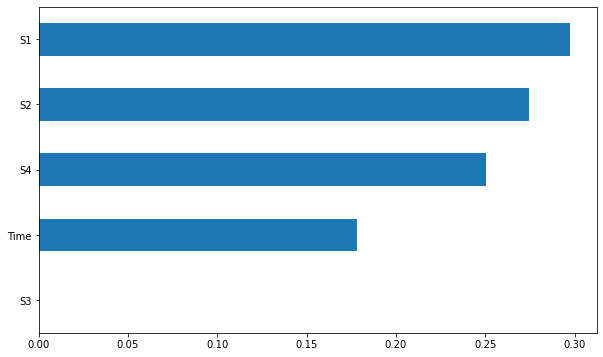

In [43]:
plt.figure(figsize=(10,6))
pd.Series(simple_model_rf.feature_importances_,simple_features).sort_values().plot.barh()

#### -- 반복하기 쉽게 함수 설정

In [44]:
# dacon에서 제공하는 평가 지표 함수
def kaeri_metric(y_true, y_pred):
    '''
    y_true: dataframe with true values of X,Y,M,V
    y_pred: dataframe with pred values of X,Y,M,V
    
    return: KAERI metric
    '''
    
    return 0.5 * E1(y_true, y_pred) + 0.5 * E2(y_true, y_pred)


### E1과 E2는 아래에 정의됨 ###

def E1(y_true, y_pred):
    '''
    y_true: dataframe with true values of X,Y,M,V
    y_pred: dataframe with pred values of X,Y,M,V
    
    return: distance error normalized with 2e+04
    '''
    
    _t, _p = np.array(y_true)[:,:2], np.array(y_pred)[:,:2]
    
    return np.mean(np.sum(np.square(_t - _p), axis = 1) / 2e+04)


def E2(y_true, y_pred):
    '''
    y_true: dataframe with true values of X,Y,M,V
    y_pred: dataframe with pred values of X,Y,M,V
    
    return: sum of mass and velocity's mean squared percentage error
    '''
    
    _t, _p = np.array(y_true)[:,2:], np.array(y_pred)[:,2:]
    
    
    return np.mean(np.sum(np.square((_t - _p) / (_t + 1e-06)), axis = 1))

In [45]:
def make_model(regressor,feature_list,data_train,target_train,data_val,target_val):
  train_X = data_train[feature_list]
  val_X = data_val[feature_list]
  train_y = target_train
  val_y = target_val

  regressor.fit(train_X,train_y)

  train_y_pred = regressor.predict(train_X)
  val_y_pred = regressor.predict(val_X)

  print("train score \n","kaeri_metric:",kaeri_metric(train_y,train_y_pred), "r2:",r2_score(train_y,train_y_pred),"mae:",mean_absolute_error(train_y,train_y_pred),"mse:",mean_squared_error(train_y,train_y_pred))
  print("val score \n","kaeri_metric:",kaeri_metric(val_y,val_y_pred), "r2:",r2_score(val_y,val_y_pred),"mae:",mean_absolute_error(val_y,val_y_pred),"mse:",mean_squared_error(val_y,val_y_pred))

  plt.figure(figsize=(10,len(regressor.feature_importances_)))
  pd.Series(regressor.feature_importances_,train_X.columns).sort_values().plot.barh()


In [46]:
# 다음에도 쓸수 있게 feature engineering용 함수를 만들어두자
def feature_eng_df(data):
  cond = (data['S1'] != 0) | (data['S2'] != 0) | (data['S3'] != 0) | (data['S4'] != 0)

  data_active = data[cond]

  data_active = data_active.drop_duplicates(['id'],keep='first')
  for n in data_active.index:
    for s in ['S1','S2','S3','S4']:
      data_active.loc[n,'delta_'+s] = data.loc[n+1,'S1']-data.loc[n,'S1']

  for s in ['S1','S2','S3','S4']:
    min_s = data.groupby(by='id').min()[s]
    max_s = data.groupby(by='id').max()[s]
    gap_s = max_s - min_s
    gap_s = gap_s.reset_index()
    gap_s.columns = ['id','gap_'+s]
    data_active = data_active.merge(gap_s,on='id')

  data_active['Time'] = (data_active['Time']*10**6).astype('int')

  data[(data['S2'] != 0)].drop_duplicates(['id'],keep='first')[['id','Time']]

  for s in ['S1','S2','S3','S4']:
    cond = (data[s] != 0)
    active_time = data[cond].drop_duplicates(['id'],keep='first')[['id','Time']]
    active_time['Time'] = (active_time['Time']*10**6).astype('int')
    active_time.columns = ['id','active_time_'+s]
    data_active = data_active.merge(active_time,on='id')

  data_active['R12'] = (data_active['active_time_S1']+data_active['active_time_S2'])/(data_active['active_time_S3']+data_active['active_time_S4'])
  data_active['R13'] = (data_active['active_time_S1']+data_active['active_time_S3'])/(data_active['active_time_S2']+data_active['active_time_S4'])
  data_active['R14'] = (data_active['active_time_S1']+data_active['active_time_S4'])/(data_active['active_time_S2']+data_active['active_time_S3'])

  data_active['RMS_S'] = (data_active['S1']**2+data_active['S2']**2+data_active['S3']**2+data_active['S4']**2)**0.5
  data_active['RMS_delta'] = (data_active['delta_S1']**2+data_active['delta_S2']**2+data_active['delta_S3']**2+data_active['delta_S4']**2)**0.5
  data_active['RMS_gap'] = (data_active['gap_S1']**2+data_active['gap_S2']**2+data_active['gap_S3']**2+data_active['gap_S4']**2)**0.5
  data_active['RMS_time'] = (data_active['active_time_S1']**2+data_active['active_time_S2']**2+data_active['active_time_S3']**2+data_active['active_time_S4']**2)**0.5

  return data_active

train score 
 kaeri_metric: 1.5780770758229317 r2: 0.6336555997568385 mae: 58.49114433438772 mse: 11701.275779059008
val score 
 kaeri_metric: 2.226805098317972 r2: 0.5028955745969736 mae: 71.2065864169991 mse: 16779.575803223073


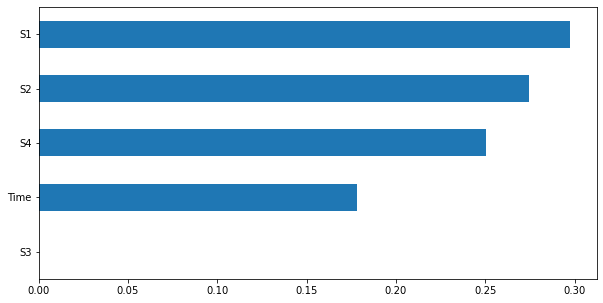

In [47]:
# 테스트
model = RandomForestRegressor(criterion='mse',max_features='auto',n_estimators=1000,oob_score=True,random_state=2,n_jobs=3)
make_model(model,simple_features,X_train,y_train,X_val,y_val)

#### -- First model (기본 feature에 delta를 추가)

In [48]:
first_features = simple_features+['delta_S1', 'delta_S2', 'delta_S3', 'delta_S4']

train score 
 kaeri_metric: 1.221700035061204 r2: 0.7198138636845637 mae: 49.19877354441337 mse: 9251.660573621286
val score 
 kaeri_metric: 1.7358819002146553 r2: 0.5945303044290102 mae: 61.49786736296376 mse: 12890.948226466564


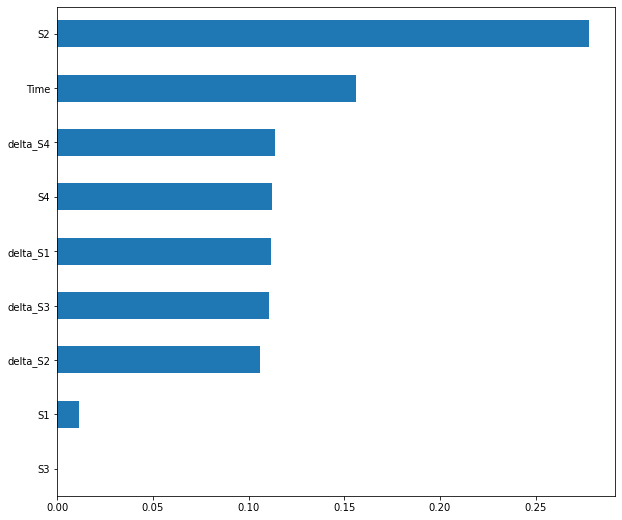

In [49]:
make_model(model,first_features,X_train,y_train,X_val,y_val)

#### -- Second model (first feauture에 gap 추가)

In [50]:
second_features = first_features+['gap_S1', 'gap_S2', 'gap_S3', 'gap_S4']

train score 
 kaeri_metric: 0.14412104885815744 r2: 0.968373251284177 mae: 16.981541227678555 mse: 1121.1219422290667
val score 
 kaeri_metric: 1.0747682814022972 r2: 0.7639523991312244 mae: 47.58173625000003 mse: 8900.39199599825


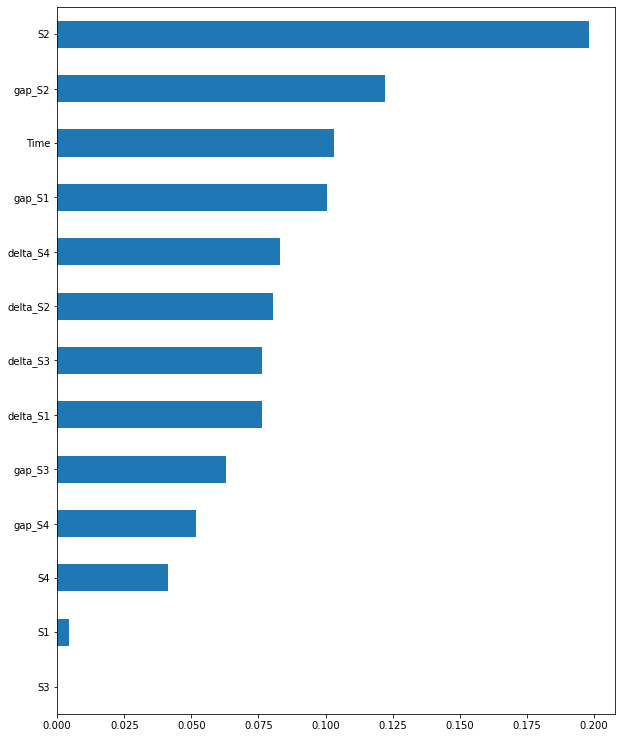

In [51]:
make_model(model,second_features,X_train,y_train,X_val,y_val)

#### -- third model (active time추가)

In [52]:
third_features = second_features+['active_time_S1', 'active_time_S2', 'active_time_S3', 'active_time_S4']

train score 
 kaeri_metric: 0.022402415001625462 r2: 0.9863376358334389 mae: 2.1252823883928573 mse: 25.524031562691953
val score 
 kaeri_metric: 0.1100033356352462 r2: 0.9105659375853561 mae: 5.480647321428567 mse: 161.4158708603927


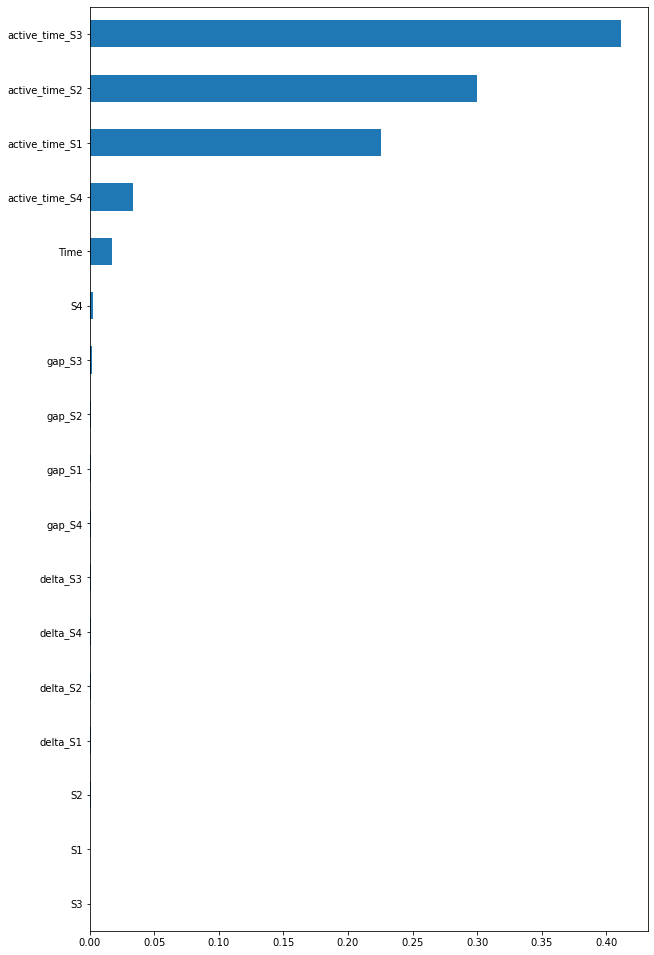

In [53]:
make_model(model,third_features,X_train,y_train,X_val,y_val)

#### -- fourth model (RMS추가)

In [54]:
fourth_features = third_features+['RMS_S', 'RMS_delta', 'RMS_gap', 'RMS_time']

train score 
 kaeri_metric: 0.02281817788019105 r2: 0.9862676445754482 mae: 2.133215379464285 mse: 25.553794808138417
val score 
 kaeri_metric: 0.11351549337108609 r2: 0.9099869427831804 mae: 5.514766696428572 mse: 162.68789532719646


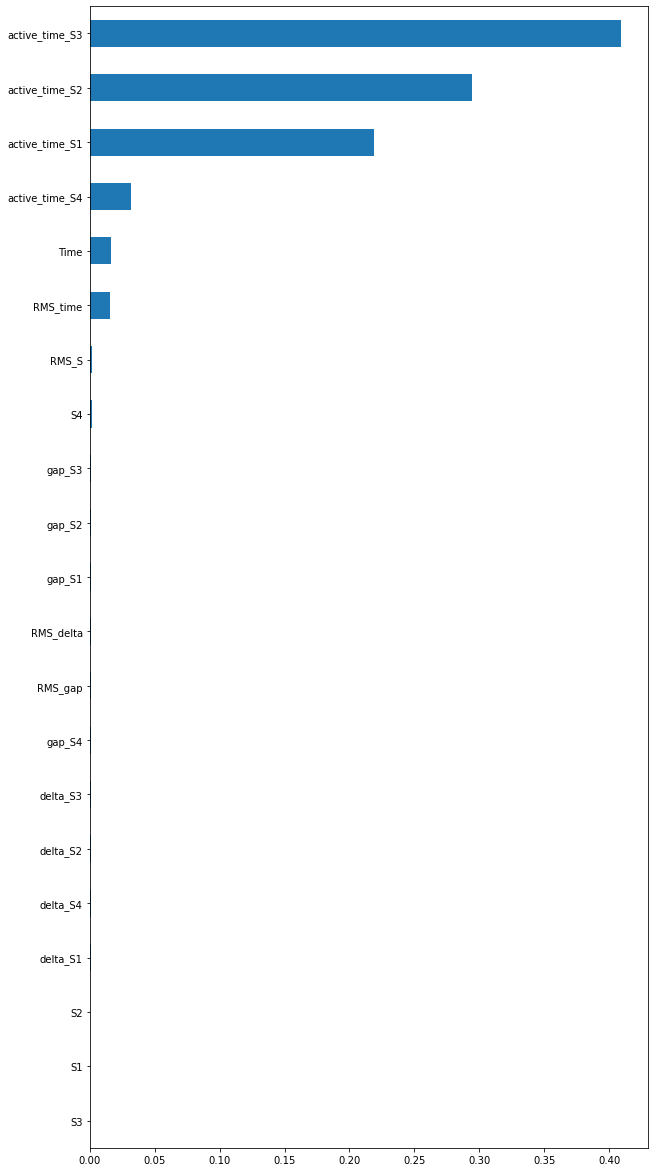

In [55]:
make_model(model,fourth_features,X_train,y_train,X_val,y_val)

#### -- All feature model (R12, R13, R14 추가)

train score 
 kaeri_metric: 0.024677981757243152 r2: 0.985862482808668 mae: 2.1396409375000003 mse: 25.599303469178604
val score 
 kaeri_metric: 0.1266867249382012 r2: 0.9046889906767542 mae: 5.646093839285711 mse: 170.39045981069654


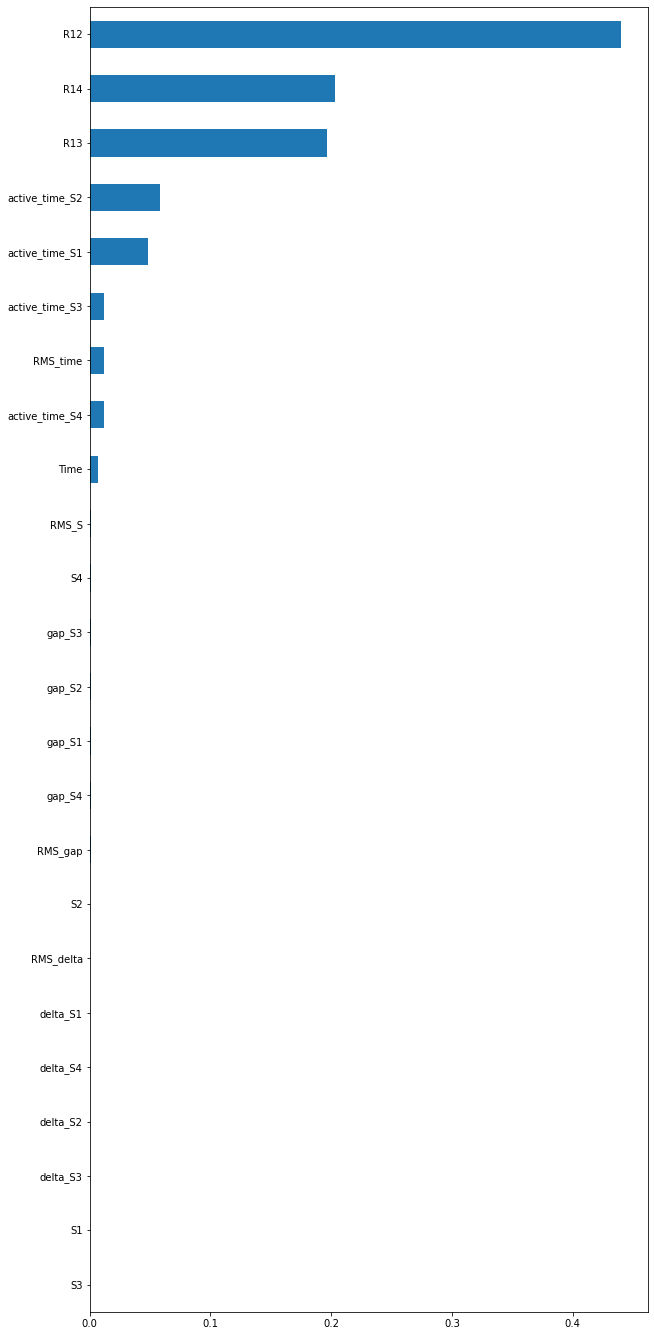

In [56]:
make_model(model,features,X_train,y_train,X_val,y_val)

#### - 확인 : 전체에서 RMS만 뺀 경우

train score 
 kaeri_metric: 0.025938352774588277 r2: 0.9855234589390816 mae: 2.1537954017857137 mse: 26.229892090562505
val score 
 kaeri_metric: 0.13076322490000528 r2: 0.902408375089309 mae: 5.663319374999994 mse: 174.3881359350891


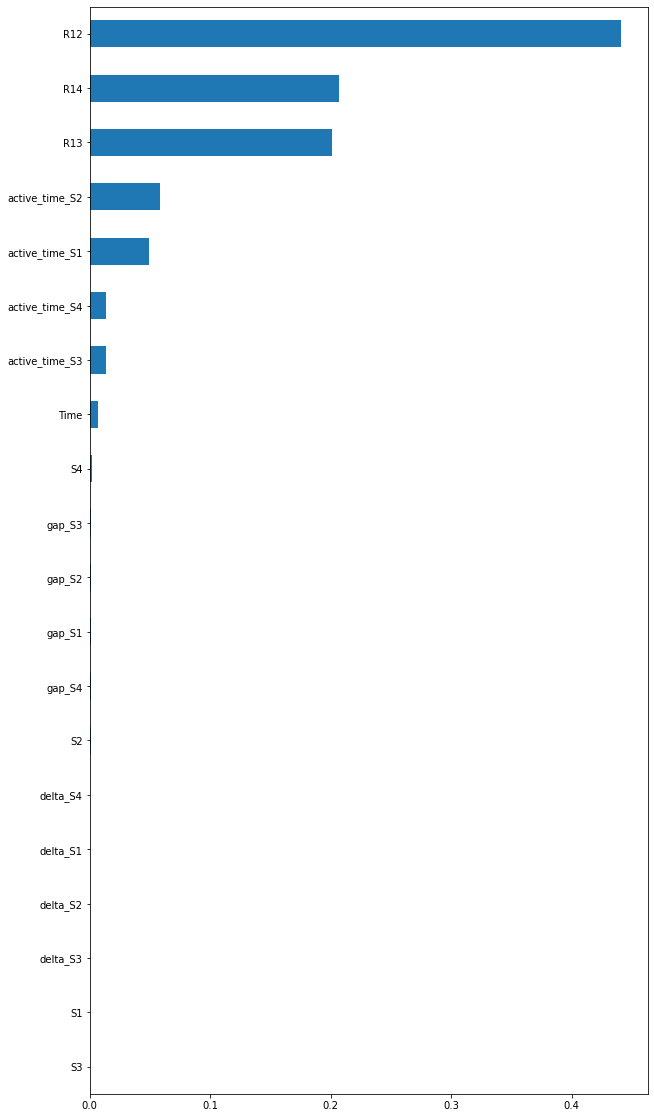

In [57]:
make_model(model,third_features+['R12','R13','R14'],X_train,y_train,X_val,y_val)

#### -- 간단한 결론
: 일단 간단하게 random forest regression을 해보았을 때, 세번째 모델이 가장 좋은 성능을 보여준다.

세번째 모델에서 RMS네가지, R12,R13,R14를 추가했을 경우
여전히 좋은 성능은 보여주지만 세번째 모델에 비해서는 약간 떨어진다
교차검증으로 확인할 필요가 있어보인다

세번째, 네번째, 다섯번째 모델의 중요도를 살펴보면
새로운 feature를 추가했을 때 active time과 Rnm이 중요도가 높은 feature가 된다.


#### -- 교차검증 (여기선 네번째 모델이 가장 좋다??)

In [58]:
def make_model_cv(data,feature_list,target_list,cv=4):
  rfrg = RandomForestRegressor(criterion='mse',max_features='auto',n_estimators=1000,oob_score=True,random_state=2,n_jobs=3)
  feature_df = data[feature_list]
  target_df = data[target_list]

  cv_score = cross_val_score(rfrg, feature_df, target_df, cv=cv)
  return cv_score

In [59]:
make_model_cv(train_data,third_features,targets)

array([0.89419446, 0.89379885, 0.89373654, 0.89562441])

In [60]:
make_model_cv(train_data,fourth_features,targets)

array([0.89515455, 0.89326477, 0.89225587, 0.89692856])

In [61]:
make_model_cv(train_data,features,targets)

array([0.88841894, 0.89013215, 0.88354831, 0.89350888])

#### -- Dacon에 실제로 제출해보기

- 평가지표가 단순히 r2같은게 아니어서 그런지, all_features를 쓴 경우가 더 좋은 결과가 나왔다 (낮을 수록 좋은 결과)

- All feature model <br/>
public : 0.2198434025 <br/>
private : 0.2224032958 <br/>

- third model <br/>
public : 0.3416845492 <br/>
private : 0.2972977849 

In [62]:
all_model_rf = RandomForestRegressor(criterion='mse',max_features='auto',n_estimators=1000,oob_score=True,random_state=2,n_jobs=3)

In [63]:
all_model_rf.fit(train_data[features],train_data[targets])

RandomForestRegressor(n_estimators=1000, n_jobs=3, oob_score=True,
                      random_state=2)

In [64]:
test_features = pd.read_csv('D:/Data/KAERI_dataset/test_features.csv')
test_data = feature_eng_df(test_features)
y_test_pred = all_model_rf.predict(test_data[features])
y_test_pred

array([[-2.75100e+02,  2.70000e+00,  5.28500e+01,  6.48800e-01],
       [ 3.11200e+02, -2.76500e+02,  7.09500e+01,  5.89200e-01],
       [-2.43300e+02,  1.35800e+02,  7.51000e+01,  3.78600e-01],
       ...,
       [ 3.62000e+02, -3.23600e+02,  1.00875e+02,  3.28200e-01],
       [ 2.00600e+02, -3.87100e+02,  9.84500e+01,  5.59600e-01],
       [ 9.21000e+01,  2.77400e+02,  5.48750e+01,  4.05600e-01]])

In [65]:
submit = pd.read_csv('D:/Data/KAERI_dataset/sample_submission.csv')

submit.head()

,id,X,Y,M,V
0,2800,0,0,0,0
1,2801,0,0,0,0
2,2802,0,0,0,0
3,2803,0,0,0,0
4,2804,0,0,0,0


In [66]:
for i in range(4):
    submit.iloc[:,i+1] = y_test_pred[:,i]
submit.head()

,id,X,Y,M,V
0,2800,-275.1,2.7,52.850,0.6488
1,2801,311.2,-276.5,70.950,0.5892
2,2802,-243.3,135.8,75.100,0.3786
3,2803,160.1,236.9,70.275,0.4826
4,2804,-152.4,199.0,89.625,0.5504


In [67]:
submit.to_csv('D:/Data/KAERI_dataset/Dacon_baseline.csv', index = False)
# public : 0.2198434025
# private : 0.2224032958

In [69]:
thrid_model_rf = RandomForestRegressor(criterion='mse',max_features='auto',n_estimators=1000,oob_score=True,random_state=2,n_jobs=3)
thrid_model_rf.fit(train_data[third_features],train_data[targets])
test_features = pd.read_csv('D:/Data/KAERI_dataset/test_features.csv')
test_data = feature_eng_df(test_features)
y_test_pred = thrid_model_rf.predict(test_data[third_features])
submit = pd.read_csv('D:/Data/KAERI_dataset/sample_submission.csv')
for i in range(4):
    submit.iloc[:,i+1] = y_test_pred[:,i]
submit.head()

,id,X,Y,M,V
0,2800,-299.8,-0.5,31.325,0.6920
1,2801,300.1,-299.9,63.600,0.6138
2,2802,-230.3,145.4,71.950,0.3614
3,2803,146.9,266.3,91.875,0.3944
4,2804,-205.5,210.7,83.850,0.5510


In [70]:
submit.to_csv('D:/Data/KAERI_dataset/submission_3rd_model.csv', index = False)
# public : 0.3416845492
# private : 0.2972977849

#### -- 결론 / 앞으로 해볼 것

- 네가지 타겟 X, Y, M, V를 어느정도 잘 예측 해내었다(학습을 통해 정확성이 눈에 띄게 증가했다) <br/>
: 특성공학 없이 단순히 RandomForestRegressor를 사용하는 것(simple model) 만으로도, baseline model대비 2분의 1로 MAE, MSE가 줄어들었다. <br/>
(MAE_base : 123.59, MSE_base : 34765.63) <br/>
(MAE_simple : 71.21, MSE_simple :16779.58) <br/>
: 특성공학으로 새로운 feature를 넣어준 뒤, RandomForestRegressor를 사용하는 것으로 baseline model 대비 20분의 1로, simple model대비 10분의 1 정도로 MAE, MSE가 줄어들었다.<br/>
(MAE_all : 5.68, MSE_all :172.43) <br/>
<br/>

- 만들어둔 feature는 전부 쓰는 것이 좋겠다  <br/>
: 추가한 feature들이, importance로 확인해 봤을 때 대체로 기본적으로 있던 feature들보다 높은 순위를 보여주었다.
<br/>

- 평가지표로 kaeri metric을 사용하는 것이 좋겠다 <br/>
: 좀더 확실한 차이를 보여주는 것 같다. 다른 지표로만 봤을 때는, 중요도가 높은 feature를 추가 했는데도 성능이 떨어지는 것 처럼 보였다. <br/>
: 대신, dacon에서 제공하는 kaeri metric이 어떤 것인지, 왜 이렇게 만들어 졌고 어떤 정확성을 요구하는 것인지 조사해둘 필요가 있다
<br/>

- train data의 kaeri metric은 0.02정도로, val data와의 차이가 크다(과적합).<br/>
 하이퍼파라미터를 조정해서 과적합을 해소시켜보자<br/>
 (사실 mae, mse로만 봐도 과적합 되어 있다는 건 드러난다)
<br/>

- 특성공학으로 푸리에 급수를 이용해서, 진동을 몇가지 진동수로 바꾸어 대입시켜 보자
<br/>

- 몇가지 특성을 살펴서, 카테고리컬로 다룰 수 있어 보이는 게 있으면 그걸 number가 아니라 string으로 바꾸고, target encoding을 해주어 보자